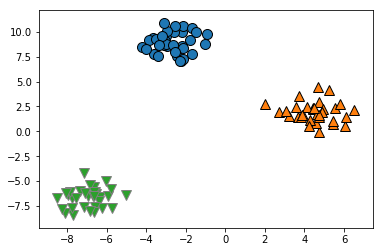

In [3]:
import mglearn
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

In [9]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492463  0.23140293]
 [ 0.47621814 -0.06937354]
 [-0.18914594 -0.20399646]]
[-1.07745459  0.13140815 -0.08604883]


[-6.68277973 -6.21996489 -5.75715006 -5.29433522 -4.83152038 -4.36870555
 -3.90589071 -3.44307587 -2.98026104 -2.5174462  -2.05463136 -1.59181652
 -1.12900169 -0.66618685 -0.20337201  0.25944282  0.72225766  1.1850725
  1.64788733  2.11070217  2.57351701  3.03633185  3.49914668  3.96196152
  4.42477636  4.88759119  5.35040603  5.81322087  6.2760357   6.73885054
  7.20166538  7.66448022  8.12729505  8.59010989  9.05292473  9.51573956
  9.9785544  10.44136924 10.90418407 11.36699891 11.82981375 12.29262859
 12.75544342 13.21825826 13.6810731  14.14388793 14.60670277 15.06951761
 15.53233244 15.99514728]
[-101.07404053  -96.87125473  -92.66846894  -88.46568315  -84.26289736
  -80.06011157  -75.85732577  -71.65453998  -67.45175419  -63.2489684
  -59.0461826   -54.84339681  -50.64061102  -46.43782523  -42.23503944
  -38.03225364  -33.82946785  -29.62668206  -25.42389627  -21.22111047
  -17.01832468  -12.81553889   -8.6127531    -4.40996731   -0.20718151
    3.99560428    8.19839007   12.401

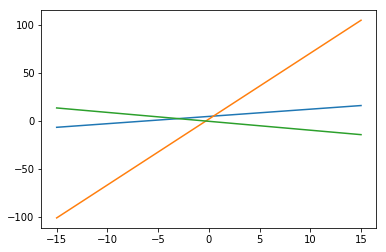

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np;
line = np.linspace(-15,15)
for coef,intercept,color in zip (linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    print(-(line * coef[0] + intercept) / coef[1])
    plt.plot(line,-(line * coef[0] + intercept) / coef[1])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9882629107981221
0.951048951048951


In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

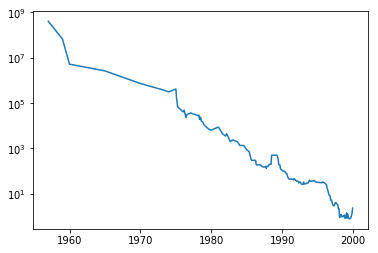

In [37]:
from sklearn.tree import DecisionTreeRegressor
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

data_train=ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
plt.semilogy(data_train.date,data_train.price,label="Training data")

In [38]:
print("2.3.6")

2.3.6
